#  Análise da distribuição dos medicamentos para COVID-19

**Análise feita baseada na aula do professor Marcos Guimarães do Observatório Social de Brasília (https://github.com/OSBrasilia).**

---

Detalhamento da distribuição dos medicamentos Cloroquina e Oseltamivir realizada pelo Ministério da Saúde no ano de 2020.

*Dataset: https://opendatasus.saude.gov.br/dataset/distribuicao-de-medicamentos-covid-19*  


#### Check list:
1. Definição do problema
2. Obtenção dos dados
3. Análise exploratória dos dados
4. Conclusão
        


## 1. Definição do problema
O objetivo desta análise é identicar distribuição dos medicamentos para COVID-19 para os Estados e em quais programas
de saúde esses medicamentos foram enquadrados.

## 2. Obtenção dos dados

In [1]:
# Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Carregando o arquivo de dados e gerando o DataFrame
df = pd.read_csv('./datasets/DistribuicaoCloroquinaOseltamivir.csv', sep=';', encoding='cp1252')

## 3. Análise exploratória dos dados

**Dicionário de Dados:**
* Região: Regiões do Brasil;

* UF: Unidades da Federeção;

* Destinatário: Entidade para o qual o medicamento foi enviado;

* Localidade: Nome da cidade da entidade de saúde;

* Item: Descrição do medicamento enviado;

* Programa de Saúde: Programa de saúde cujo medicamento está vinculado;

* Quantidade: Quantidade de medicamentos enviados em cápsulas (Oseltamivir) ou comprimidos (Difosfato de Cloroquina);

* Status: Situação de envio do medicamento;

* Data de entrega: Data em que o medicamento foi entregue à entidade.

In [3]:
# Visualisando o dataframe (linhas, colunas)
df.head(5)

,REGIÃO,UF,DESTINATARIO,LOCALIDADE,ITEM,PROGRAMA DE SAÚDE,QUANTIDADE,STATUS,DATA DE ENTREGA
0,NORDESTE,ALAGOAS,SES,ALAGOAS,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,-350.0,REMANEJAMENTO,04/09/2020
1,NORDESTE,MARANHÃO,SES,MARANHÃO,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,-180.0,REMANEJAMENTO,04/09/2020
2,NORDESTE,PARAÍBA,SES,PARAÍBA,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,-40.0,REMANEJAMENTO,04/09/2020
3,CENTRO-OESTE,DISTRITO FEDERAL,SES,DISTRITO FEDERAL,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,-10.0,REMANEJAMENTO,04/09/2020
4,NORDESTE,RIO GRANDE DO NORTE,SES,RIO GRANDE DO NORTE,DIFOSFATO DE CLOROQUINA 150MG,COVID-19,-7.0,REMANEJAMENTO,04/09/2020


In [4]:
# Formato do dataframe
print('Formato do dataframe:', df.shape)

Formato do dataframe: (916, 9)


In [5]:
# Tipos e quantidades dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REGIÃO             916 non-null    object 
 1   UF                 916 non-null    object 
 2   DESTINATARIO       916 non-null    object 
 3   LOCALIDADE         916 non-null    object 
 4   ITEM               916 non-null    object 
 5   PROGRAMA DE SAÚDE  916 non-null    object 
 6   QUANTIDADE         915 non-null    float64
 7   STATUS             916 non-null    object 
 8   DATA DE ENTREGA    916 non-null    object 
dtypes: float64(1), object(8)
memory usage: 64.5+ KB


In [6]:
# Verificando a coluna que possui dado nulo
df[df['QUANTIDADE'].isnull()]

,REGIÃO,UF,DESTINATARIO,LOCALIDADE,ITEM,PROGRAMA DE SAÚDE,QUANTIDADE,STATUS,DATA DE ENTREGA
731,NORDESTE,PIAUÍ,SMS,TERESINA,FOSFATO DE OSELTAMIVIR 45MG,INFLUENZA,NaN,ENTREGA REALIZADA,14/09/2020


### Distribuição por região

In [7]:
# Análise inicial dos dados por região
df['REGIÃO'].value_counts()

NORDESTE        264
NORTE           219
CENTRO-OESTE    161
SUDESTE         136
SUL              93
SUL              34
NORTE             6
NORDESTE          2
SUDESTE           1
Name: REGIÃO, dtype: int64

In [8]:
# Como os nomes de algumas regiões estão se repetindo, então ten que retirar os espaços em branco dos nomes
df['REGIÃO'] = df['REGIÃO'].str.strip()

In [9]:
df['REGIÃO'].value_counts()

NORDESTE        266
NORTE           225
CENTRO-OESTE    161
SUDESTE         137
SUL             127
Name: REGIÃO, dtype: int64

### Distribuição por Estado

In [10]:
# Análise inicial dos dados por UF
df['UF'].value_counts()

MATO GROSSO             69
RIO GRANDE DO SUL       48
MINAS GERAIS            48
CEARÁ                   42
PARÁ                    41
AMAZONAS                39
SÃO PAULO               37
SANTA CATARINA          36
ACRE                    36
GOIÁS                   34
RONDÔNIA                33
PARANÁ                  31
BAHIA                   31
PIAUÍ                   28
PARAÍBA                 28
RORAIMA                 27
ESPÍRITO SANTO          26
PERNAMBUCO              25
SERGIPE                 23
RIO GRANDE DO NORTE     23
DISTRITO FEDERAL        22
AMAPA                   22
RIO DE JANEIRO          21
TOCANTINS               19
MARANHÃO                19
MATO GROSSO DO SUL      18
MATO GROSSO DO SUL      17
ALAGOAS                 15
ALAGOAS                 14
BAHIA                   11
SANTA CATARINA           8
RIO GRANDE DO NORTE      4
RIO DE JANEIRO           4
PARANÁ                   4
MARANHÃO                 3
RORAIMA                  3
ACRE                     3
A

Os nomes de alguns Estados também estão repetidos, nesse caso, é necessário retirar os espaços em branco para que eles fiquem agrupados.
O dataframe df não é tipo str, portanto não é possível utilizar diretamente o comando strip(): df = df.str.strip(). Isso retornará um erro.

Ao identificar as colunas do tipo object, será executado um loop para eliminar os espaços em branco nessas colunas.

In [11]:
# Selecionando colunas por tipo
df.select_dtypes('object').columns

Index(['REGIÃO', 'UF', 'DESTINATARIO', 'LOCALIDADE', 'ITEM',
       'PROGRAMA DE SAÚDE', 'STATUS', 'DATA DE ENTREGA'],
      dtype='object')

In [12]:
# Executando o loop
for col in df.select_dtypes('object').columns:
    df[col] = df[col].str.strip()

In [13]:
# Análise inicial dos dados por UF
df['UF'].value_counts()

MATO GROSSO            70
MINAS GERAIS           48
RIO GRANDE DO SUL      48
SANTA CATARINA         44
CEARÁ                  42
BAHIA                  42
AMAZONAS               41
PARÁ                   41
ACRE                   39
SÃO PAULO              37
MATO GROSSO DO SUL     35
PARANÁ                 35
GOIÁS                  34
RONDÔNIA               33
RORAIMA                30
ALAGOAS                29
PARAÍBA                28
PIAUÍ                  28
ESPÍRITO SANTO         27
RIO GRANDE DO NORTE    27
PERNAMBUCO             25
RIO DE JANEIRO         25
SERGIPE                23
AMAPA                  22
DISTRITO FEDERAL       22
MARANHÃO               22
TOCANTINS              19
Name: UF, dtype: int64

#### Distribuições feitas por Estado

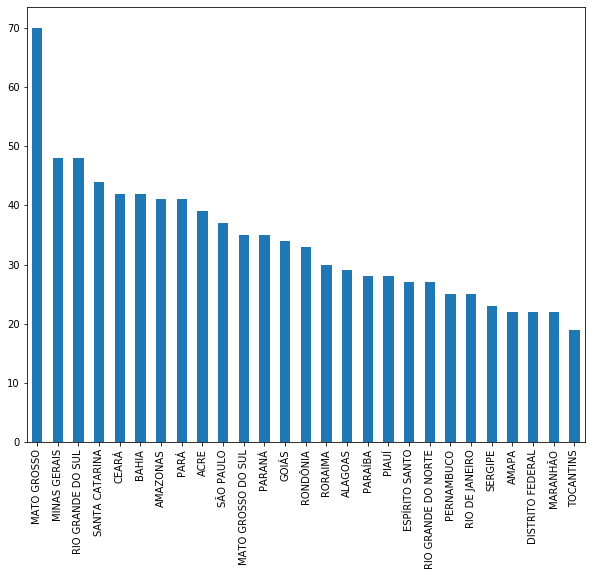

In [14]:
# Grafico de barra da distribuição total dos medicamentos
df['UF'].value_counts().plot.bar(figsize=(10, 8));

In [15]:
# Distribuição de medicamentos por Programa de Saúde
df['PROGRAMA DE SAÚDE'].value_counts()

INFLUENZA    655
COVID-19     261
Name: PROGRAMA DE SAÚDE, dtype: int64

In [16]:
# Analisando a distribuição pelo Programa de Saúde COVID-19
df[df['PROGRAMA DE SAÚDE'] == 'COVID-19']['UF'].value_counts()

MATO GROSSO            34
RIO GRANDE DO SUL      30
MINAS GERAIS           18
SANTA CATARINA         17
RORAIMA                14
GOIÁS                  12
BAHIA                  11
SÃO PAULO               9
ALAGOAS                 8
PARANÁ                  8
MATO GROSSO DO SUL      7
RIO GRANDE DO NORTE     7
ESPÍRITO SANTO          7
ACRE                    7
AMAZONAS                7
PARÁ                    6
PERNAMBUCO              6
PIAUÍ                   6
RONDÔNIA                6
RIO DE JANEIRO          6
PARAÍBA                 6
AMAPA                   5
CEARÁ                   5
TOCANTINS               5
DISTRITO FEDERAL        5
MARANHÃO                5
SERGIPE                 4
Name: UF, dtype: int64

In [17]:
# Quais medicamentos foram distribuidos
df['ITEM'].value_counts()

FOSFATO DE OSELTAMIVIR 75MG      284
DIFOSFATO DE CLOROQUINA 150MG    236
FOSFATO DE OSELTAMIVIR 30MG      188
FOSFATO DE OSELTAMIVIR 45MG      183
HIDROXICLOROQUINA 200MG           25
Name: ITEM, dtype: int64

In [18]:
# Criar uma tabela dinamica (pivot table) cruzando os medicamentos e os Programa de Saúde
tabela_medicamentos = pd.pivot_table(df, values='QUANTIDADE', index=['UF'], columns=['PROGRAMA DE SAÚDE'])


In [19]:
tabela_medicamentos.head()

PROGRAMA DE SAÚDE,COVID-19,INFLUENZA
UF,,
ACRE,24.928571,12.828437
ALAGOAS,8.687500,30.619048
AMAPA,17.600000,189.441176
AMAZONAS,73.000000,28.957647
BAHIA,25.500000,10.828065


### Distrubuição por Estado por Programa de Saúde

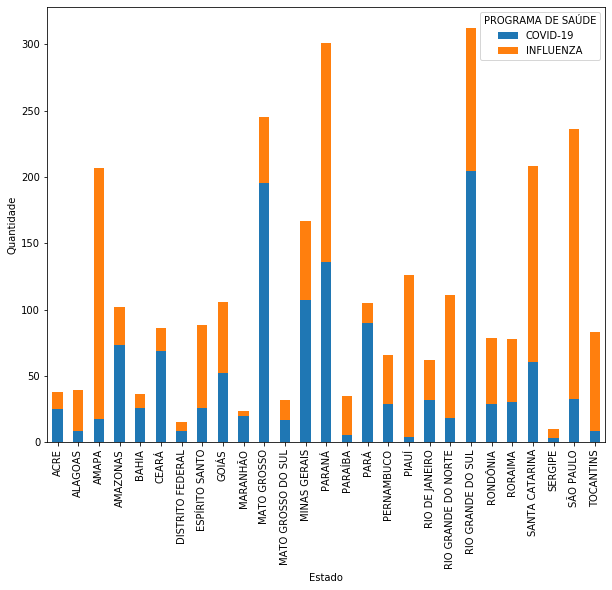

In [20]:
# Plotar gráfico da barras
tabela_medicamentos.plot.bar(stacked=True, figsize=(10,8))

# Nome dos eixos
plt.xlabel('Estado')
plt.ylabel('Quantidade');

### Conhecendo a população estimada por Estado

In [21]:
# Carregando o arquivo de dados e gerando o DataFrame

df_populacao = pd.read_excel('./datasets/populacao-estados-ibge.xlsx',skiprows=2)
df_populacao.head()

,UF [-],Código [-],Gentílico [-],Governador [2019],Capital [2010],Área Territorial - km² [2020],População estimada - pessoas [2020],Densidade demográfica - hab/km² [2010],Matrículas no ensino fundamental - matrículas [2018],IDH <span>Índice de desenvolvimento humano</span> [2010],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],Rendimento mensal domiciliar per capita - R$ [2020],Total de veículos - veículos [2018]
0,Acre,12.0,acriano,GLADSON DE LIMA CAMELI,Rio Branco,164173.431,894470.0,4.47,157646.0,0.663,6.632883e+06,6.084417e+06,917.0,277831.0
1,Alagoas,27.0,alagoano,JOSE RENAN VASCONCELOS CALHEIROS FILHO,Maceió,27830.656,3351543.0,112.33,490587.0,0.631,1.195044e+07,1.046063e+07,796.0,834827.0
2,Amapá,16.0,amapaense,ANTONIO WALDEZ GÓES DA SILVA,Macapá,142470.762,861773.0,4.69,136185.0,0.708,5.396417e+06,4.224464e+06,893.0,195039.0
3,Amazonas,13.0,amazonense,WILSON MIRANDA LIMA,Manaus,1559167.878,4207714.0,2.23,705007.0,0.674,1.732846e+07,1.532490e+07,852.0,883083.0
4,Bahia,29.0,baiano,RUI COSTA DOS SANTOS,Salvador,564760.427,14930634.0,24.82,2034711.0,0.660,5.019100e+07,4.557016e+07,965.0,4139107.0


In [22]:
# Selecionando apenas as colunas que identificam o Estado e a População estimada 
df_populacao = df_populacao[['UF [-]', 'População estimada - pessoas [2020]']]

In [23]:
# Visualizando o Dataframe
df_populacao.tail()

,UF [-],População estimada - pessoas [2020]
37,Matrículas no ensino fundamental: Ministério ...,NaN
38,"Total de veículos: Ministério das Cidades, Dep...",NaN
39,Receitas realizadas: Contas anuais. Receitas o...,NaN
40,Despesas empenhadas: Contas anuais. Receitas o...,NaN
41,"Rendimento mensal domiciliar per capita: IBGE,...",NaN


In [24]:
# Tipos e quantidades dos dados
df_populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UF [-]                               40 non-null     object 
 1   População estimada - pessoas [2020]  27 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [25]:
# Verificando a coluna que possui dado nulo (População estimada - pessoas [2020])
df_populacao[df_populacao['População estimada - pessoas [2020]'].isnull()]

,UF [-],População estimada - pessoas [2020]
27,NaN,NaN
28,NaN,NaN
29,Notas:,NaN
30,População estimada: Diferença de 780 pessoas e...,NaN
31,Rendimento mensal domiciliar per capita: As es...,NaN
32,Fontes:,NaN
33,Área Territorial: Área territorial brasileira....,NaN
34,"População estimada: IBGE, Diretoria de Pesquis...",NaN
35,"Densidade demográfica: IBGE, Censo Demográfico...",NaN
36,IDH Índice de desenvolvimento humano : Progra...,NaN


In [26]:
# Excluido onde possui dados nulos, pois se trata de Notas de rodapé
df_populacao = df_populacao.dropna()
df_populacao.tail()

,UF [-],População estimada - pessoas [2020]
22,Roraima,631181.0
23,Santa Catarina,7252502.0
24,São Paulo,46289333.0
25,Sergipe,2318822.0
26,Tocantins,1590248.0


In [27]:
# Tipos e quantidades dos dados
df_populacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UF [-]                               27 non-null     object 
 1   População estimada - pessoas [2020]  27 non-null     float64
dtypes: float64(1), object(1)
memory usage: 648.0+ bytes


### Distribuição de medicamentos por 100.000 habitantes

In [28]:
# Data Frame com as quantidades de medicamentos distribuidos para os Estados
total_medicamentos = df.groupby(['UF'])['QUANTIDADE'].sum().reset_index()

In [29]:
total_medicamentos.head(30)

,UF,QUANTIDADE
0,ACRE,585.01
1,ALAGOAS,712.50
2,AMAPA,3308.50
3,AMAZONAS,1495.56
4,BAHIA,616.17
5,CEARÁ,986.63
6,DISTRITO FEDERAL,163.46
7,ESPÍRITO SANTO,1441.40
8,GOIÁS,1803.53
9,MARANHÃO,161.07


In [30]:
total_medicamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UF          27 non-null     object 
 1   QUANTIDADE  27 non-null     float64
dtypes: float64(1), object(1)
memory usage: 560.0+ bytes


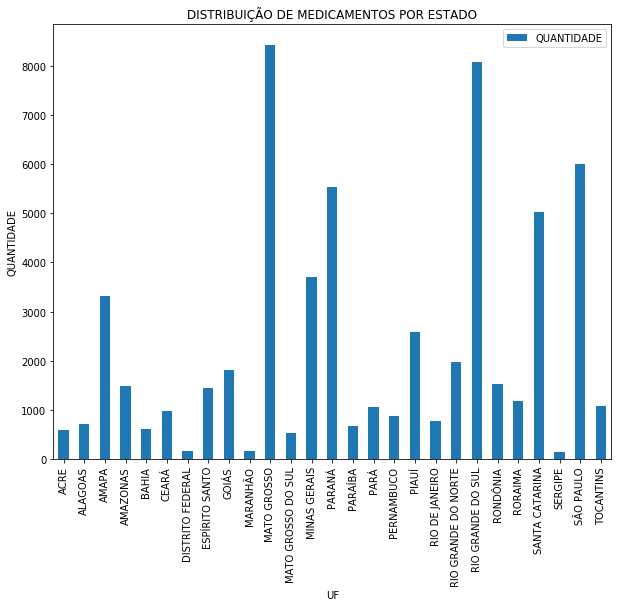

In [31]:
# Grafico de barras da taxa de distribuição de medicamentos
total_medicamentos.plot.bar(x='UF', y='QUANTIDADE', figsize=(10,8))

# Exibir legenda
plt.legend()

# Titulo
plt.title('DISTRIBUIÇÃO DE MEDICAMENTOS POR ESTADO')

# Nome dos eixos
plt.xlabel('UF')
plt.ylabel('QUANTIDADE');

In [32]:
# Unindo os dataframes total_medicamentos e populaão
df_medic_pupulacao = total_medicamentos.join(df_populacao)
df_medic_pupulacao.head()

,UF,QUANTIDADE,UF [-],População estimada - pessoas [2020]
0,ACRE,585.01,Acre,894470.0
1,ALAGOAS,712.50,Alagoas,3351543.0
2,AMAPA,3308.50,Amapá,861773.0
3,AMAZONAS,1495.56,Amazonas,4207714.0
4,BAHIA,616.17,Bahia,14930634.0


In [33]:
df_medic_pupulacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UF                                   27 non-null     object 
 1   QUANTIDADE                           27 non-null     float64
 2   UF [-]                               27 non-null     object 
 3   População estimada - pessoas [2020]  27 non-null     float64
dtypes: float64(2), object(2)
memory usage: 992.0+ bytes


In [34]:
# Eliminando a coluna duplicada dos Estados ( UF [-])
df_medic_pupulacao = df_medic_pupulacao.drop(columns=['UF [-]'])

In [35]:
# Renomeando a coluna população
df_medic_pupulacao.rename(columns={'População estimada - pessoas [2020]': 'POPULAÇÃO'}, inplace = True)

df_medic_pupulacao.head()

,UF,QUANTIDADE,POPULAÇÃO
0,ACRE,585.01,894470.0
1,ALAGOAS,712.50,3351543.0
2,AMAPA,3308.50,861773.0
3,AMAZONAS,1495.56,4207714.0
4,BAHIA,616.17,14930634.0


In [36]:
# Criar uma nova coluna com a relação de distribuição de medicamentos por 100 mol habitantes
df_medic_pupulacao['Medicamentos/100k hab'] = df_medic_pupulacao['QUANTIDADE'] / (df_medic_pupulacao['POPULAÇÃO']/100000)

In [37]:
df_medic_pupulacao

,UF,QUANTIDADE,POPULAÇÃO,Medicamentos/100k hab
0,ACRE,585.01,894470.0,65.402976
1,ALAGOAS,712.50,3351543.0,21.258865
2,AMAPA,3308.50,861773.0,383.917807
3,AMAZONAS,1495.56,4207714.0,35.543290
4,BAHIA,616.17,14930634.0,4.126884
5,CEARÁ,986.63,9187103.0,10.739294
6,DISTRITO FEDERAL,163.46,3055149.0,5.350312
7,ESPÍRITO SANTO,1441.40,4064052.0,35.467066
8,GOIÁS,1803.53,7113540.0,25.353481
9,MARANHÃO,161.07,7114598.0,2.263937


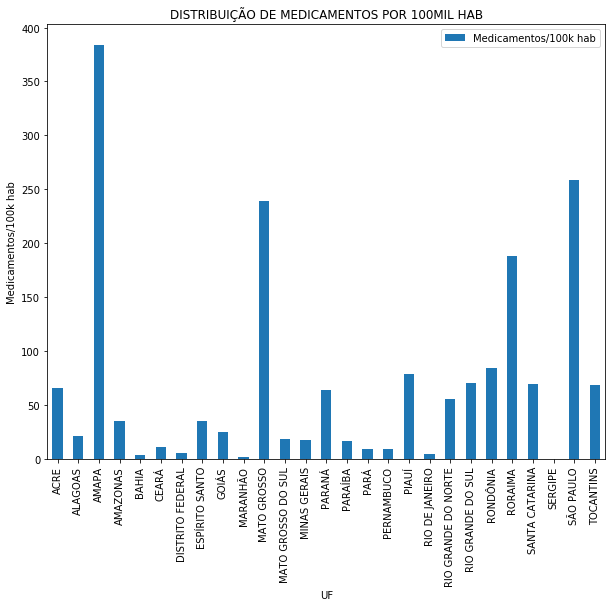

In [38]:
# Grafico de barras da taxa de distribuição de medicamentos por 100 mil habitantes
df_medic_pupulacao.plot.bar(x='UF', y='Medicamentos/100k hab', figsize=(10,8))

# Exibir legenda
plt.legend()

# Titulo
plt.title('DISTRIBUIÇÃO DE MEDICAMENTOS POR 100MIL HAB')

# Nome dos eixos
plt.xlabel('UF')
plt.ylabel('Medicamentos/100k hab');




## 4. Conclusão

Foram apresentadas algumas informações sobre a distribuição dos medicamentos para COVID-19 e em quais programas de saúde foi dada essa distribuição.
Os Estados com que mais receberam medicamentos em valor absoluto foram Mato Grosso, Rio Grande do Sul e São Paulo.
Mas os que receberam mais medicamentos proporcionalmente à população foram Amapá, São Paulo e Mato Grosso.
